In [26]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

#Load file
dataframe = pd.read_csv("data.csv", delimiter=";")

print(f"We got {len(dataframe)} rows and {len(dataframe.columns)} columns")

We got 181 rows and 52 columns


In [27]:
#Extract Data
features = dataframe.iloc[:, [2,4,6,8,10,12,14,16,18,20,21,23,24,26,28,30,32,33,35,36,37,38,41,42]]
target = dataframe.iloc[:, [43]]

#Treat string data as NaN
pd.options.mode.chained_assignment = None
for col in features:
    features[col]=pd.to_numeric(features[col], errors='coerce') 

#Replace NaN by mean value
imp = SimpleImputer(missing_values=pd.NA, strategy='mean')
features=pd.DataFrame(imp.fit_transform(features))
features

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,64.41,...,51.85,70.12,2.00,64.38,485.0,33.87,68.07,6.0,1.012000,61.80855
1,900.00,15.84,2.20,0.00,0.00,40.04,0.0,0.00,0.00,19.18,...,54.41,69.66,5.00,60.91,93.0,34.13,67.59,6.0,1.022000,61.80855
2,629.64,429.44,3.08,9.68,0.00,41.36,0.0,0.00,0.00,12.65,...,52.29,72.14,0.00,57.17,120.0,13.72,9.31,9.0,1.015000,40.85000
3,0.00,4.40,1.76,0.00,0.00,47.96,0.0,0.00,0.00,65.76,...,55.07,72.65,1.00,65.90,21.0,35.38,33.27,7.0,1.004000,1.18000
4,91.74,7.04,7.92,1.76,0.44,64.24,0.0,0.00,0.00,54.43,...,48.03,68.66,9.00,59.06,185.0,34.14,68.37,6.0,1.022000,61.80855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,900.00,1800.00,0.00,0.00,0.00,2904.00,0.0,14.70,0.00,10.01,...,51.95,67.17,3.00,50.65,318.0,37.49,63.65,6.0,1.019000,18.92000
177,91.38,1663.20,0.00,0.51,1.02,434.58,0.0,14.72,21.32,14.37,...,51.97,71.11,5.57,54.92,663.0,29.21,68.01,5.0,1.016000,118.00000
178,495.00,452.60,18.90,0.00,0.00,3997.70,0.0,18.90,0.00,15.57,...,54.51,68.75,3.00,41.22,670.0,38.54,37.18,7.0,1.018000,16.99000
179,257.40,1047.20,0.00,0.00,0.00,1839.20,0.0,26.40,1025.20,10.20,...,47.05,68.93,5.00,58.73,230.0,16.96,12.04,8.0,1.013000,125.77000


In [28]:
#Problem space has >10 dimensions, we fall into https://en.wikipedia.org/wiki/Curse_of_dimensionality. 
#Let's find the most relevant dimension using PCA

#We first need to normalize the data
scaledFeatures = pd.DataFrame(preprocessing.scale(features),columns = features.columns)

pca = PCA()

principalComponents = pca.fit_transform(scaledFeatures)

print (f"percentage of precision with the number of components :\n {pca.explained_variance_ratio_.cumsum()}")

#relationship from data to component
#print(pd.DataFrame(pca.components_,columns=x.columns))
principalDf = pd.DataFrame(data = principalComponents)

finalDf = pd.concat([principalDf, target], axis = 1)

percentage of precision with the number of components :
 [0.16419816 0.2812246  0.37609558 0.45331358 0.51909239 0.57526783
 0.62665339 0.67346428 0.71608223 0.75531898 0.79229646 0.82317947
 0.85265613 0.88119648 0.90617699 0.92860305 0.94704769 0.96139573
 0.97418628 0.98472437 0.99363429 0.99747712 0.99906669 1.        ]


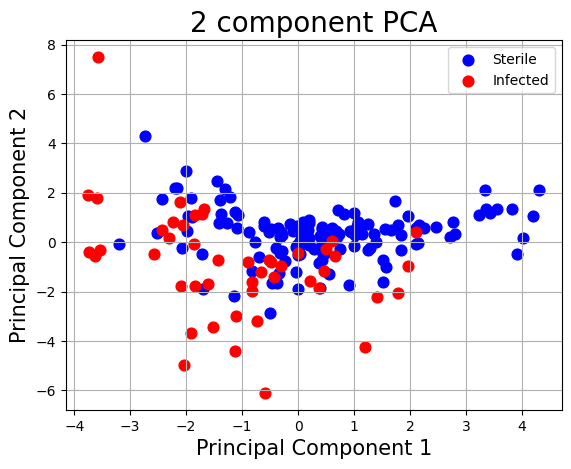

In [29]:
#plot the first 2 principals components
fig = plt.figure()
ax = fig.add_subplot() 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

cond = finalDf.iloc[:,-1:] == 0
cond = cond.squeeze()
subset_a = finalDf[cond.squeeze()]
subset_b = finalDf[~cond]
plt.scatter(subset_a.iloc[:,1], subset_a.iloc[:,2], s=60, c='b', label='Sterile')
plt.scatter(subset_b.iloc[:,1], subset_b.iloc[:,2], s=60, c='r', label='Infected') 
ax.legend()
ax.grid()

In [30]:
#Lets try to classify anyway, using https://medium.com/thrive-in-ai/classification-algorithms-in-python-5f58a7a27b88

from sklearn.model_selection import train_test_split

In [31]:
#Using Linear Regression
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train,Y_test = train_test_split(scaledFeatures, target, test_size=0.2)
lr_clf = LogisticRegression().fit(X_train,Y_train.values.ravel())
lr_clf.score(X_test,Y_test)

0.8108108108108109

In [32]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train,Y_test = train_test_split(scaledFeatures, target, test_size=0.2)
lr_clf = RandomForestClassifier().fit(X_train,Y_train.values.ravel())
lr_clf.score(X_test,Y_test)

0.8918918918918919

In [33]:
#Using naive_bayes
from sklearn.naive_bayes import GaussianNB
X_train, X_test, Y_train,Y_test = train_test_split(scaledFeatures, target, test_size=0.2)
lr_clf = GaussianNB().fit(X_train,Y_train.values.ravel())
lr_clf.score(X_test,Y_test)

0.8108108108108109

In [34]:
#Using Nearest Neighbours Classification
from sklearn import neighbors
X_train, X_test, Y_train,Y_test = train_test_split(scaledFeatures, target, test_size=0.2)
lr_clf = neighbors.KNeighborsClassifier().fit(X_train,Y_train.values.ravel())
lr_clf.score(X_test,Y_test)

0.7297297297297297

In [35]:
#using SVM Classifier
from sklearn import svm
X_train, X_test, Y_train,Y_test = train_test_split(scaledFeatures, target, test_size=0.2)
lr_clf = svm.SVC(kernel = 'linear').fit(X_train,Y_train.values.ravel())
lr_clf.score(X_test,Y_test)

0.9459459459459459

In [39]:
#using gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, Y_train,Y_test = train_test_split(scaledFeatures, target, test_size=0.2)
lr_clf = GradientBoostingClassifier().fit(X_train,Y_train.values.ravel())
lr_clf.score(X_test,Y_test)

0.8648648648648649